# Visualizing Data in Python

## Plotting in Python: matplotlib

We can collect and import data, but it is often much more enlightening to present our results in plots rather than tables, so let's discuss basic plotting in Python with experimental data. For simplicity, that we will assume we are starting with some nice, tabulated data in Python (If not, see the sections Importing and the Manipulating data!)

Specifically, let's look at the following data, which tracks the concentrations of reactants and products during the hydrolysis of aspirin. [Data obtained online from here](https://saylordotorg.github.io/text_general-chemistry-principles-patterns-and-applications-v1.0/s18-02-reaction-rates-and-rate-laws.html). Speaking broadly, you can see that, over some hours, the concentration of aspirin (acetylsalicylic acid) is decreasing, and the concentration of the salicylic acid product is increasing.

```{figure} images/hydrolysis_aspirin.jpg
---
width: 600px
---
```


| Time (h) | [Aspirin] (M)          | [Salicylic Acid] (M)    |
| -------- | ---------------------- | ----------------------- |
| 0        | 5.55 × 10<sup>−3</sup> | 0                       |
| 2.0      | 5.51 × 10<sup>−3</sup> | 0.040 × 10<sup>−3</sup> |
| 5.0      | 5.45 × 10<sup>−3</sup> | 0.10 × 10<sup>−3</sup>  |
| 10       | 5.35 × 10<sup>−3</sup> | 0.20 × 10<sup>−3</sup>  |
| 20       | 5.15 × 10<sup>−3</sup> | 0.40 × 10<sup>−3</sup>  |
| 30       | 4.96 × 10<sup>−3</sup> | 0.59 × 10<sup>−3</sup>  |
| 40       | 4.78 × 10<sup>−3</sup> | 0.77 × 10<sup>−3</sup>  |
| 50       | 4.61 × 10<sup>−3</sup> | 0.94 × 10<sup>−3</sup>  |
| 100      | 3.83 × 10<sup>−3</sup> | 1.72 × 10<sup>−3</sup>  |
| 200      | 2.64 × 10<sup>−3</sup> | 2.91 × 10<sup>−3</sup>  |
| 300      | 1.82 × 10<sup>−3</sup> | 3.73 × 10<sup>−3</sup>  |


First, as always when coding, we start by importing our packages. Then, we will import our data from the `*.txt` file where it's stored.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # Plot in the notebook

time, conc_aspirin, conc_acid = np.genfromtxt('data/aspirin_data.txt',delimiter=',',skip_header=1,unpack=True)

UsageError: unrecognized arguments: # Plot in the notebook


Now what we imported before was matplotlib.pyplot and labelled it plt. Therefore, we can use all the built-in functionality of the package matplotlib.pyplot easily.

First and foremost, we can simply call `plt.plot(x_array,y_array)` to do a quick plot. We can do this as many times as we want in a single cell to plot multiple arrays on a single graph. Here, we can plot the decreasing concentration of aspirin, and the increasing concentration of salicylic acid.

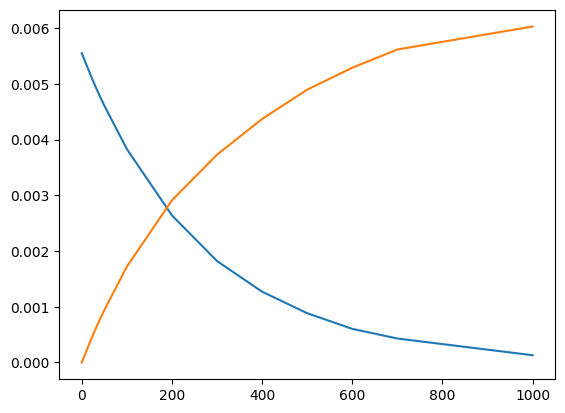

In [ ]:
# plotting data
plt.plot(time,conc_aspirin)
plt.plot(time,conc_acid);

You'll have noticed that the result was a line plot. This is most appropriate for a continuous function, such as a theoretical model. Usually, for discrete data, is it more appropriate to use a scatter plot. We can achieve this by calling `plt.scatter` instead:

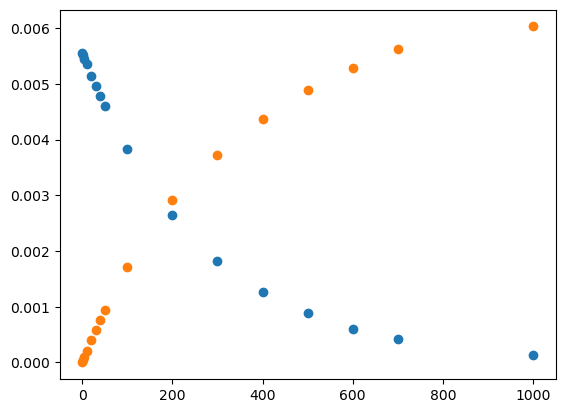

In [ ]:
# plotting data
plt.scatter(time,conc_aspirin)
plt.scatter(time,conc_acid);

And thats all we need to do to plot our data! In day-to-day research, we generate quick plots like these *all the time* to inspect experimental results, and verify the results of steps in post-processing. What's convenient about `matplotlib` is that it, by default, can generate limits, ranges, and tick positions of interest for us automatically in these quick plots.

Obviously though, we are missing many visual elements that could help us better communicate the meaning of our data. Titles, axes labels, legends, etc. can all play vital roles in telling our scientific story, and we can add those by adding additional lines to the simple code listed above. See below:

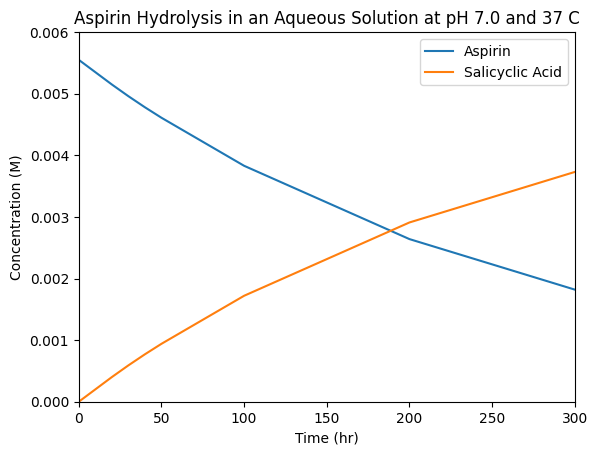

In [ ]:
# plot our data and label
plt.plot(time,conc_aspirin,label='Aspirin')
plt.plot(time,conc_acid,label='Salicyclic Acid')
# label x and y axis
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
plt.ylim(bottom=0,top=0.006)
# create legend
plt.legend();

You can now see how this more publication-quality plot contains some additional information that would give context to the average reader. The view presented could be tailored to highlight a partiuclar aspect, for instance the behaviour in the first 300h, as we show here. The adage 'a picture is worth a thousand words' is meaninful in science, it can be worth the time to think about how best to present some data to allow the reader to evaluate (and hopefully accept!) your particular hypothesis.
Lastly we are also not restricted to line graphs, and there are countless options for visual elements to add/modify such as colors, linesizes, linestyles, etc. Very extensive instructions can be found online [in the official matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). However, we'll give a quick example to highlight some useful options:

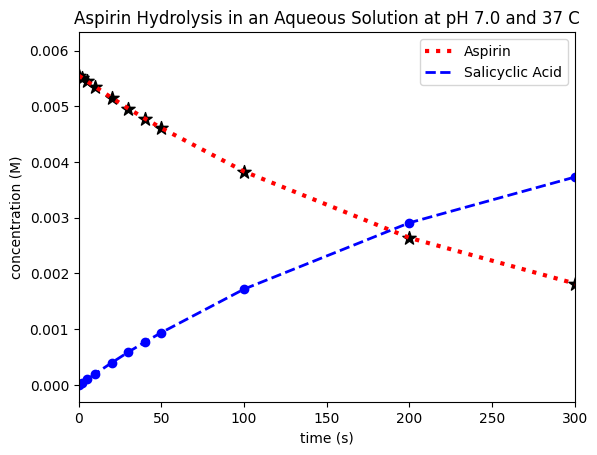

In [ ]:
# plotting data, but with more options
plt.plot(time,conc_aspirin,color='red',linestyle=':',linewidth=3,label='Aspirin') # linestyle is the type of line, linewidth is the thickness of the line
plt.plot(time,conc_acid,color='blue',linestyle='--',linewidth=2,label='Salicyclic Acid')

# we can also do a scatterplot to highlight the data points
plt.scatter(time,conc_aspirin,marker='*',color='black',s=100) # marker is the shape of the data point, s is the size
plt.scatter(time,conc_acid,marker='o',color='blue')

# label x and y axis
plt.xlabel('time (s)')
plt.ylabel('concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
# generate legend
plt.legend();

You can see that we're able to e.g. change linestyles, colours, and markers, which can all help make relevant aspects clear and accessible to all readers.

## Annotating your plot: plt.annotate()

`````{admonition} For CHM223 students
:class: important
This subsection is relevant for your assignment!
`````

Additionally, Python allows us to *programatically* annotate our plots---automatically add additional text that can help our reader. This is useful if we want to add a label to a specific point on our plot, or if we want to add a label to a specific line on our plot. We can do this using the `plt.annotate()` function. 

This function takes four arguments: the text (string) that we want to add, the co-ordinates (x,y) of the data point that we're looking to draw attention to, and second (optional) set of co-ordinates (xtext,ytext) where we want text itself to be located---particularly if we want to offset it a bit (or just include extra information somewhere else in the plot!) and, lastly, the colour of the text. A nice additional feature is that we can instruct the program to draw an arrow from the text to the particular data point as emphasis! We include an example that uses all of these features below:

`plt.annotate('text goes here',xy=(xvalue,yvalue),xytext=(xfortext,yfortext),color='color')`

For example, if we want to label the point where the first data points where the concentrations cross over and add the text "more acid starting here" to the point (200,0.004) on our plot, we can do so using the following code:

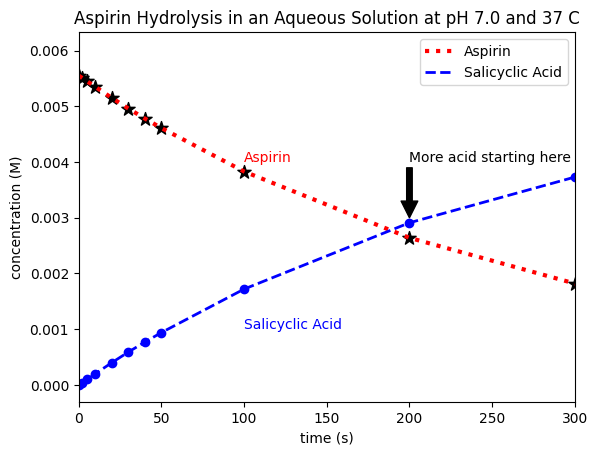

In [ ]:
# plotting data, but with more options
plt.plot(time,conc_aspirin,color='red',linestyle=':',linewidth=3,label='Aspirin') # linestyle is the type of line, linewidth is the thickness of the line
plt.plot(time,conc_acid,color='blue',linestyle='--',linewidth=2,label='Salicyclic Acid')

# we can also do a scatterplot to highlight the data points
plt.scatter(time,conc_aspirin,marker='*',color='black',s=100) # marker is the shape of the data point, s is the size
plt.scatter(time,conc_acid,marker='o',color='blue')

# label x and y axis
plt.xlabel('time (s)')
plt.ylabel('concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
# generate legend
plt.legend()

# annotate the plot with text
#xy is the position of the data point, xytext is the position of the text.
plt.annotate('Aspirin',xy=(100,0.005),xytext=(100,0.004),color='red')
plt.annotate('Salicyclic Acid',xy=(100,0.0005),xytext=(100,0.001),color='blue')
# annotate the first data points after crossing over
plt.annotate('More acid starting here',xy=(200,0.003),xytext=(200,0.004),arrowprops=dict(facecolor='black'));
# arrow will point from text position xytext to data point xy by adding arrowprop part!

Remember that each of these 'co-ordinates' could also be calculated from the data, which can be especially useful to define regions in our graph after automatically locating certain positions, extrema, or values in our data. For example, here, we manually labelled the crossover point. However, if determining this for an unknown data set was particularly relevant, we could write code to find the first data point where `conc_acid > conc_aspirin`, and then include a line to add text (e.g. "more acid starting here") at that point on our plot.

## Alternative scale plots: log, inverse, etc

matplotlib has built-in axis scalings based on how you would like to present your data. For instance, you'll recall from first year that we can determine a reaction order by generating a few types of plots with customized axes. For a first-order reaction, we are interested in the logarithm of our concentration data. We can easily change the vertical axis to a logaritmic scale using the `plt.yscale()` command as follows:

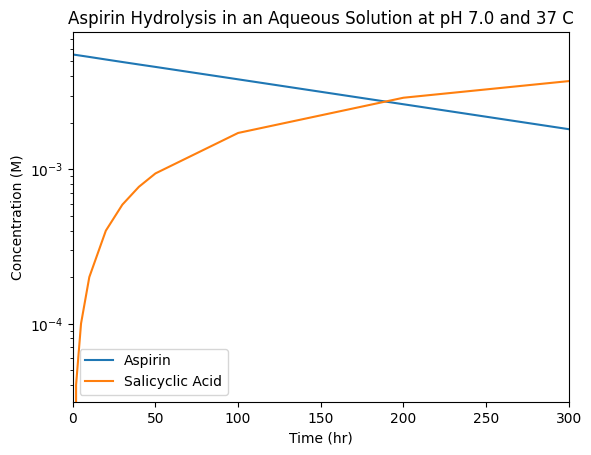

In [ ]:
# plot our data and label
plt.plot(time, conc_aspirin, label='Aspirin')
plt.plot(time, conc_acid, label='Salicyclic Acid')

# label x and y axis
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')

# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0, right=300)

# set y-axis to logarithmic scale
plt.yscale('log')

# create legend
plt.legend();

Rather than taking the log of the underlying data, this simply changes the visualization, while creating log-spaced tick marks.

From this plot, we can see that the linear (apparent) decrease in the aspirin concentration on a semi-log plot indicates that it's hydrolysis obeys a first-order rate law. However, the salicyclic acid data in this plot appears to behaves strangely. This is because it, instead, starting from zero concentration before rising as $A(1-e^{-t / 	\tau})$ so we'd need to think a bit harder to either manipulate the data, or generate custom plot axes to highlight this relationship. (We'll leave aside for a moment any additional underlying dependencies in this reaction, for instance on pH!)